**TERM DEPOSIT MARKETING**

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.


**Data Description:**

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns

**Attributes**

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Output (desired target):**

y - has the client subscribed to a term deposit? (binary)


**Goal(s):**

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.



Ensemble Model :

Data collection -> Data Visualization -> Preprocessing -> Modeling -> Cross validation - > predication and accuracy

In [281]:
#Importing 
import numpy as np
import pandas as pd
import random
import seaborn as sb
import matplotlib.pyplot as mpl
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

#For traing model and CV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [3]:
#importing Data
from google.colab import files
 
 
uploaded = files.upload()

Saving term-deposit-marketing-2020.csv to term-deposit-marketing-2020.csv


In [194]:
#Read data
path = 'term-deposit-marketing-2020.csv'
data = pd.read_csv(path)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [196]:
#Describe Data
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [197]:
from IPython.utils.text import num_ini_spaces
#Subdefine types of datas
# These are all numbers
num_F = ['age','balance','day','duration','campaign'] 
#These are all binary/string values
cat_F = ['job','marital','education','default','housing','loan','contact','month','y']



In [198]:
#Extract output/final answer
YesAns = data[data.y == 'yes']
NoAns = data[data.y =='no']



***Difference of Means***

In [199]:
#organize all answers and count them

#YES VALUE
print(" Yes answers collected data :")
meanYes = YesAns[num_F].mean()
print (meanYes) 
print()
 #NO VALUE
print(" No answers collected data :")
meanNo = NoAns[num_F].mean()
print(meanNo)
print()
print("Difference of yes and No mean : ")
print(meanYes-meanNo)

 Yes answers collected data :
age           39.844959
balance     1588.495856
day           15.827003
duration     682.958564
campaign       2.414365
dtype: float64

 No answers collected data :
age           40.599208
balance     1249.752533
day           16.032072
duration     221.408042
campaign       2.918688
dtype: float64

Difference of yes and No mean : 
age          -0.754249
balance     338.743323
day          -0.205069
duration    461.550521
campaign     -0.504323
dtype: float64


***Difference of Max***

In [200]:
#YES VALUE
print(" Yes answers collected data :")
maxYes = YesAns[num_F].max()
print (maxYes) 
print()
 #NO VALUE
print(" No answers collected data :")
maxNo = NoAns[num_F].max()
print(maxNo)
print()
print("Difference of yes and No max : ")
print(maxYes-maxNo)

 Yes answers collected data :
age            95
balance     45248
day            31
duration     3881
campaign       32
dtype: int64

 No answers collected data :
age             94
balance     102127
day             31
duration      4918
campaign        63
dtype: int64

Difference of yes and No max : 
age             1
balance    -56879
day             0
duration    -1037
campaign      -31
dtype: int64


***Difference of Median***

In [201]:
#YES VALUE
print(" Yes answers collected data :")
medYes = YesAns[num_F].median()
print (medYes) 
print()
 #NO VALUE
print(" No answers collected data :")
medNo = NoAns[num_F].median()
print(medNo)
print()
print("Difference of yes and No median : ")
print(medYes-medNo)

 Yes answers collected data :
age          37.0
balance     620.0
day          16.0
duration    629.0
campaign      2.0
dtype: float64

 No answers collected data :
age          39.0
balance     395.0
day          17.0
duration    164.0
campaign      2.0
dtype: float64

Difference of yes and No median : 
age          -2.0
balance     225.0
day          -1.0
duration    465.0
campaign      0.0
dtype: float64


**DATA Visualization **

creating plot to present data and compare them for diffent attributes

Appendix :
Using seaborn for better visualization as we are comparing multiple attribute at the same time
The best format would be violin plot as it can compare data more accurate

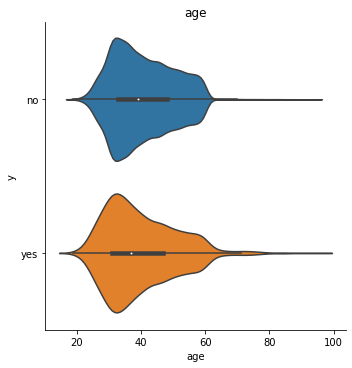

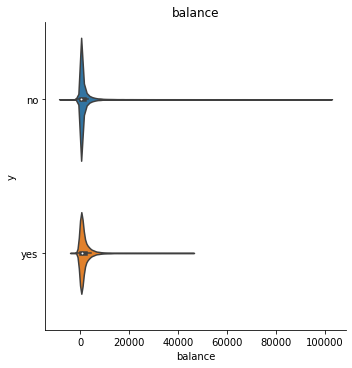

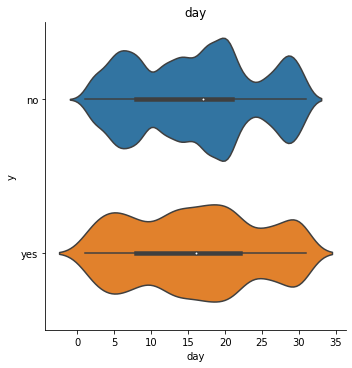

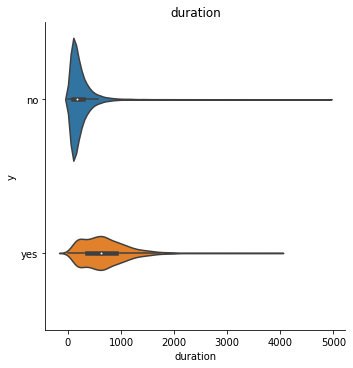

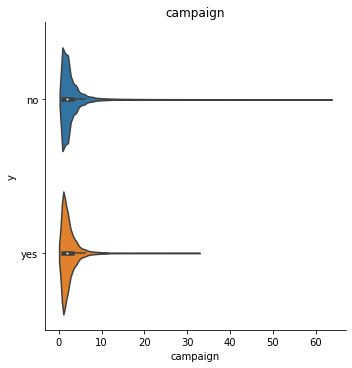

In [202]:
for feature in num_F : 
  sb.catplot(x=feature, y = 'y', kind="violin", data=data)
  mpl.title(feature)
  mpl.show()

Result of these graphs: 

Based on given results, the longer call, the person more likely to subscrbe 

***Comparing Categories ***

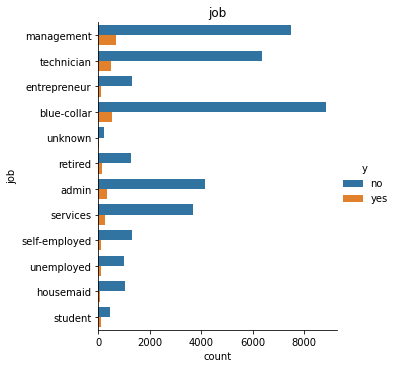

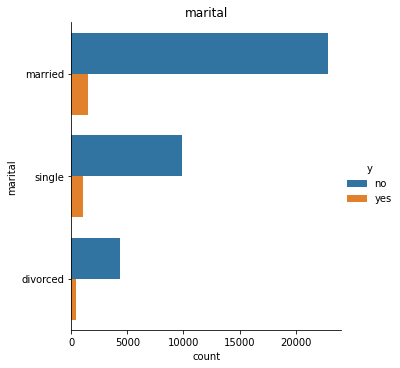

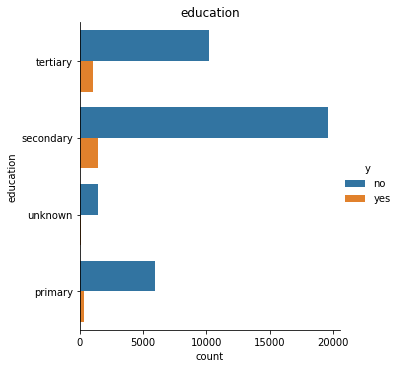

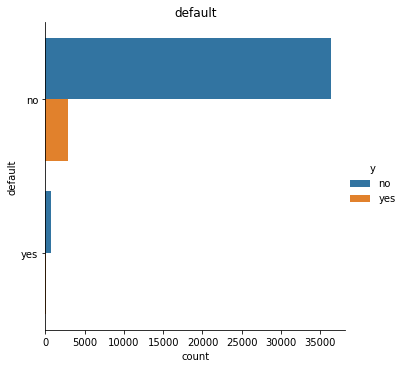

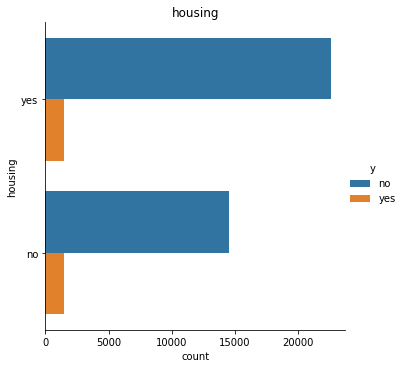

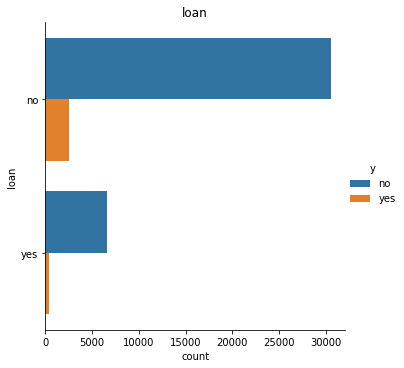

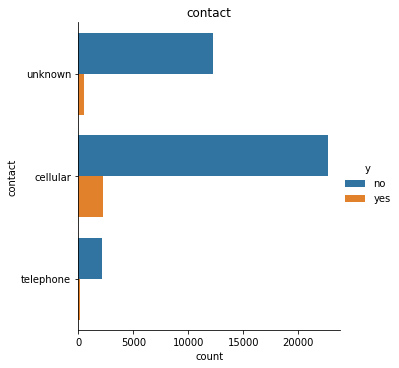

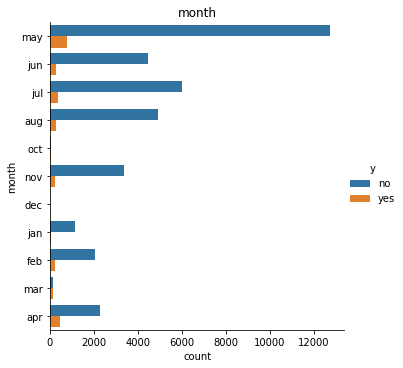

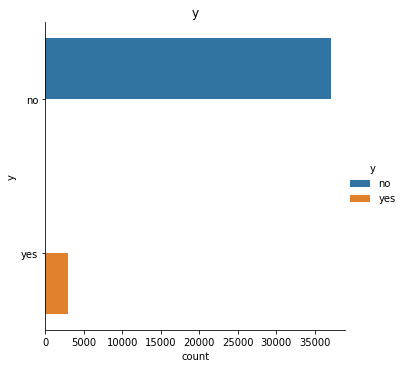

In [203]:
for feature in cat_F :
  sb.catplot(y=feature, hue='y', kind="count", data=data)
  mpl.title(feature)
  mpl.show()

***PreProcessing***

***Adjustment in Boolean(binary) values to 0 and 1***

In [231]:
#Default , housing, loan and subsribed are all binay
#data.loc use to select data by label
data1 = data.copy()

#Default 
data1.loc[data1.default == 'yes', 'default'] = 1
data1.loc[data1.default == 'no', 'default'] = 0
data1.default = data1.default.astype('int64')


#Housing
data1.loc[data1.housing == 'yes', 'housing'] = 1
data1.loc[data1.housing == 'no', 'housing'] = 0
data1.housing = data1.housing.astype('int64')


#Loan 
data1.loc[data1.loan == 'yes', 'loan'] = 1
data1.loc[data1.loan == 'no', 'loan'] = 0
data1.loan = data1.loan.astype('int64')


#Subscription
data1.loc[data1.y == 'yes', 'y'] = 1
data1.loc[data1.y == 'no', 'y'] = 0
data1.y = data1.y.astype('int64')


***Breakdown category/string data***

***AGE***

In [232]:
#Find min and max of age
maxAge = data1['age'].loc[data1['age'].idxmax()]
minAge = data1['age'].loc[data1['age'].idxmin()]
print("min age is: ",minAge,"and max age is :" ,maxAge)

min age is:  19 and max age is : 95


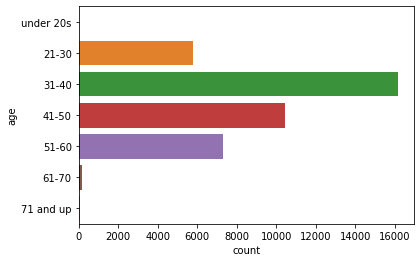

In [233]:
#create them into a bin range and label them
bins = [0, 20, 30, 40, 50, 60, 70, data1.age.max()]
labels = ['under 20s','21-30', '31-40','41-50','51-60','61-70','71 and up']

data1.age = pd.cut(data1.age, bins=bins, labels=labels)
sb.countplot(data = data1, y="age")
mpl.show()

***DURATION***

In [234]:
#find range of duration
maxDuration = data1['duration'].loc[data1['duration'].idxmax()]/60
minDuration = data1['duration'].loc[data1['duration'].idxmin()]/60

print("longest duration is : " , maxDuration, " and shortest is :", minDuration)

longest duration is :  81.96666666666667  and shortest is : 0.0


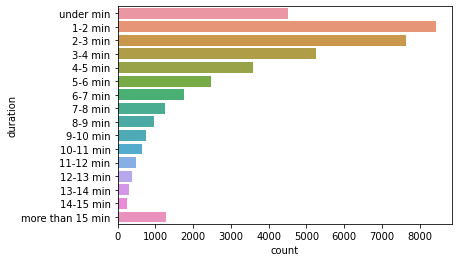

In [235]:
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, data1.duration.max()]
labels = ['under min','1-2 min', '2-3 min','3-4 min', '4-5 min', '5-6 min', '6-7 min','7-8 min', '8-9 min', '9-10 min', '10-11 min','11-12 min', '12-13 min', '13-14 min','14-15 min','more than 15 min']

data1.duration = pd.cut(data1.duration, bins=bins, labels=labels)

sb.countplot(data=data1, y='duration')
mpl.show()

***COMPAIGN***

In [236]:
#Find range of Compaign
maxCom = data1['campaign'].loc[data1['campaign'].idxmax()]
minCom = data1['campaign'].loc[data1['campaign'].idxmin()]

print("longest compaign is : " , maxCom , " and shortest is :", minCom)

longest compaign is :  63  and shortest is : 1


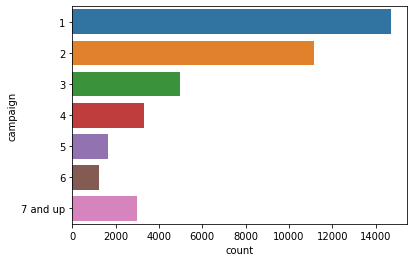

In [237]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, data1.campaign.max()]
labels = ['1','2','3','4','5','6','7 and up']

data1.campaign = pd.cut(data1.campaign, bins= bins, labels = labels)
sb.countplot(data=data1 , y = 'campaign')
mpl.show()

***BALANCE***

In [238]:
#Find range of balance
maxbal = data1['balance'].loc[data1['balance'].idxmax()]
minbal = data1['balance'].loc[data1['balance'].idxmin()]

print("highest balance is : " , maxbal , " and lowest is :", minbal)

highest balance is :  102127  and lowest is : -8019


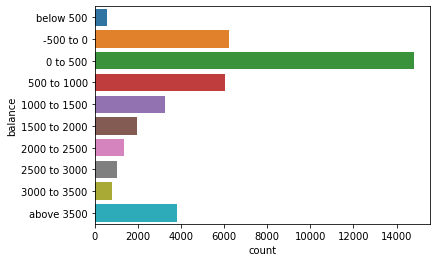

In [239]:
# as we are binning values, we need to round them to last number 
# hence math.ceil() is using
bins = [-1000, -500, 0, 500, 1000, 1500, 2000, 2500, 3000, 3500, math.ceil(data1.balance.max())]
labels = ['below 500', '-500 to 0', '0 to 500', '500 to 1000', '1000 to 1500', '1500 to 2000', '2000 to 2500', '2500 to 3000', '3000 to 3500','above 3500']

data1.balance = pd.cut(data1.balance, bins= bins, labels = labels)
sb.countplot(data=data1, y='balance')
mpl.show()


***JOBS***

In [240]:
data1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

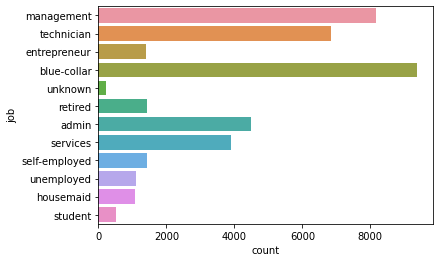

In [241]:
#as jobs are string we need to organize them in array
sb.countplot(data=data1, y='job')

mpl.show()

In [242]:
#organize them
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,51-60,management,married,tertiary,0,2000 to 2500,1,0,unknown,5,may,4-5 min,1,0
1,41-50,technician,single,secondary,0,0 to 500,1,0,unknown,5,may,2-3 min,1,0
2,31-40,entrepreneur,married,secondary,0,0 to 500,1,1,unknown,5,may,1-2 min,1,0
3,41-50,blue-collar,married,unknown,0,1500 to 2000,1,0,unknown,5,may,1-2 min,1,0
4,31-40,unknown,single,unknown,0,0 to 500,0,0,unknown,5,may,3-4 min,1,0


***TRAINING MODEL***

To find the relationship between various data, we need to use feature/data correlation

In [243]:
#purpose of using dummies is to convert categorical variable to dummy variable whicha re numberic variable that are used to represent catogircal data
data2 = data1.copy()
data2 = pd.get_dummies(data2)
data2 = data2.rename(columns={"y": "subscribed"})


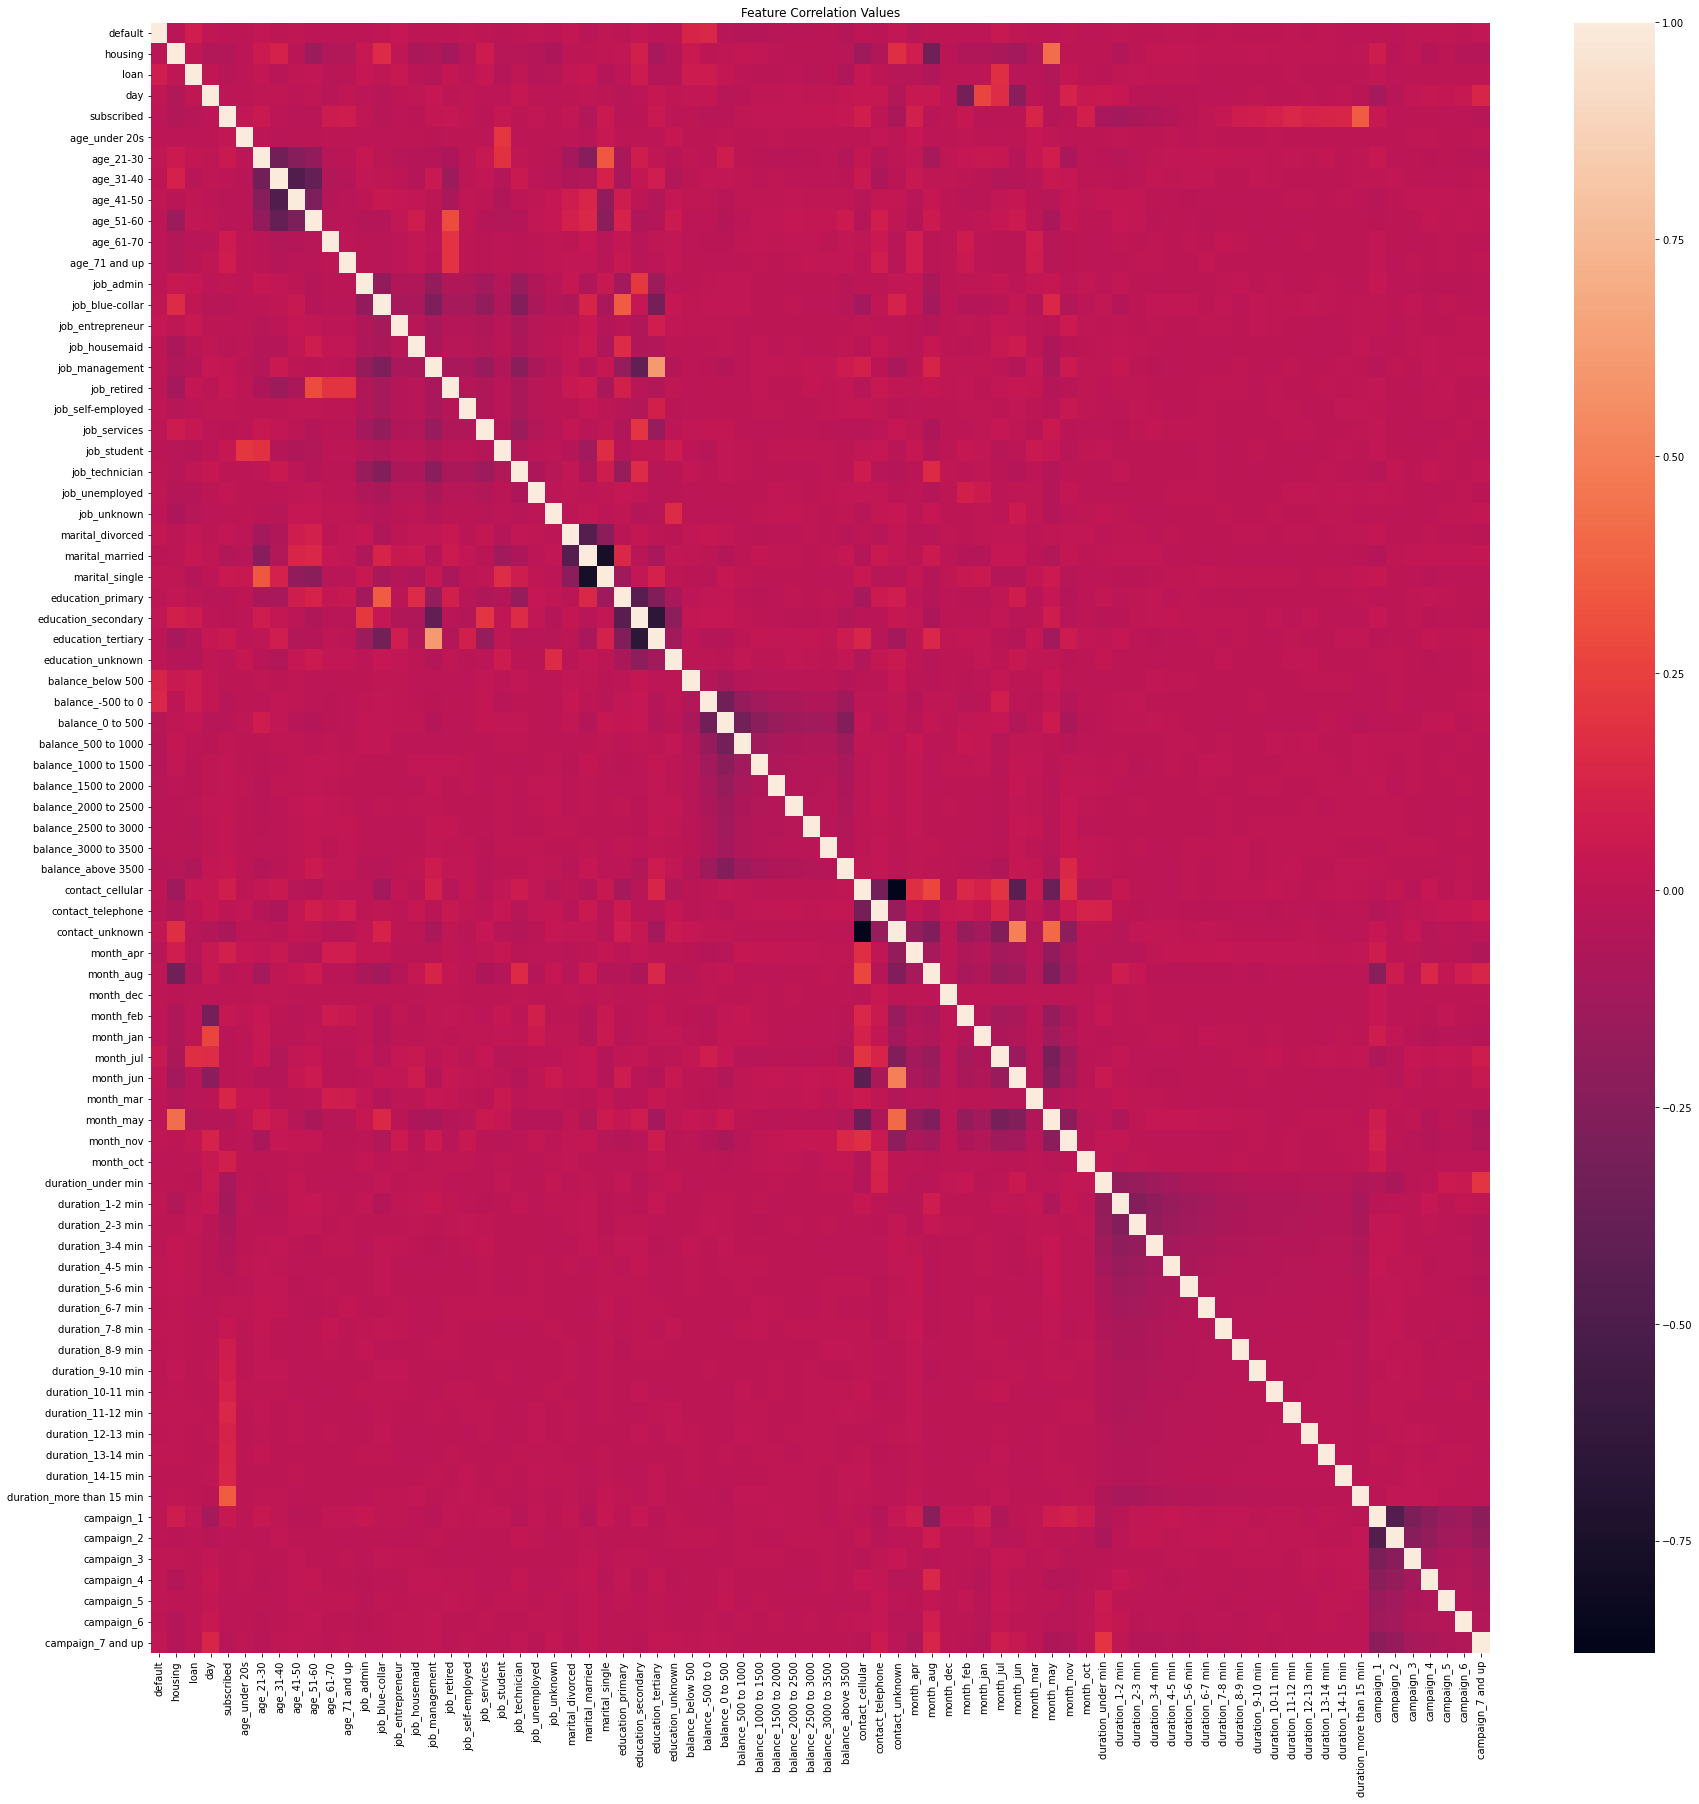

In [244]:

mpl.figure(figsize=(30,30))
mpl.title('Feature Correlation Values')
sb.heatmap(data2.corr())
mpl.show()

In [282]:
listModel = [LogisticRegression(max_iter = 10000),
             SVC(),
             KNeighborsClassifier(),
             RandomForestClassifier(),
              DecisionTreeClassifier()
              ]

NameModel = ['logistic Regression',
             'SVM',
             'KNN',
             'Random Forest',
             'Decision Tree'
             ]

In [273]:
print(len(NameModel))

5


In [283]:
#unbias state( set random state)
seedvalue = 4
random.seed(seedvalue)

In [284]:
#initially devide data to X and Y column
X = data2.drop(columns='subscribed')
Y = data2.subscribed

#Split data for training the model
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state=seedvalue) 


In [285]:
# Create function that all results appear 
def BestModel(listModel, NameModel, xTrain, yTrain, xTest, yTest) :
  resultBM = pd.DataFrame()

  for i in range(len(listModel)) :
    model = listModel[i]
    model = model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    resultable =  {'name': NameModel[i],
        'model': model,
        'F1 Score': f1_score(yTest, yPred),
        'Accuracy': accuracy_score(yTest, yPred),
        'Precision': precision_score(yTest, yPred),
        'Recall': recall_score(yTest, yPred),
        'yPredict': yPred}

    resultBM = resultBM.append(resultable, ignore_index=True)
  resultBM = resultBM.set_index('name')

  return resultBM

In [286]:
result1 = BestModel(listModel, NameModel, xTrain, yTrain, xTest, yTest)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
result1.drop(columns=['model','yPredict'])

,F1 Score,Accuracy,Precision,Recall
name,,,,
logistic Regression,0.428904,0.938750,0.569659,0.343925
SVM,0.000000,0.933125,0.000000,0.000000
KNN,0.117253,0.934125,0.564516,0.065421
Random Forest,0.422764,0.937875,0.558282,0.340187
Decision Tree,0.425238,0.916875,0.395498,0.459813


***CROSS VALIDATION***

Based on these results,Random forest and Decision tree will be used for this project

In [308]:
from sklearn.model_selection import cross_val_score

#as question asked, using 5 fold cross validation
#Make function to make it more clear
def evaluationModel(classifier) :
  cls = classifier
  cls.fit(xTrain,yTrain)
  predict = cls.predict(xTest)
  CVSscore = cross_val_score(cls, X=xTrain, y=yTrain, cv=5)
  acc = accuracy_score(yTest, predict)

  print("Avg score of Cross validation is : ", CVSscore.mean())
  print("Test accuracy is :", acc)

  return cls, predict


In [311]:
class1,predclass1 = evaluationModel(RandomForestClassifier())

Avg score of Cross validation is :  0.9329374999999999
Test accuracy is : 0.9375


In [312]:
class2,predclass2 = evaluationModel(DecisionTreeClassifier())

Avg score of Cross validation is :  0.9120312500000001
Test accuracy is : 0.91575


***CONFUSION MATRIX***

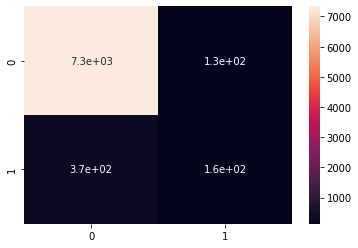

In [314]:
confusionMatrix = confusion_matrix(yTest, predclass1)
dfconfuaionMatrix = pd.DataFrame(confusionMatrix, index = [i for i in "01"],
                                 columns = [i for i in "01"])

#plot
mpl.figure()
sb.heatmap(dfconfuaionMatrix, annot = True)
mpl.ylabel = ('Actual value')
mpl.xlabel = ('predicted value')
mpl.show()

***CONCLUSION***


Based on given results, machine larning model can be use to predict the subscription to term deposit. The Random Forest classifier had highest accuracy and with 4 fold cross validation, the accuracy was above 93%.